### 목표 : 당뇨병 예측 모델 구현
- 데이터 : scikit-learn dataset
- 피쳐 : 10
- 타겟 : 정수값

(1) 모듈 로딩 및 데이터 준비

In [147]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [148]:
## 데이터 로딩
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [149]:
featureArray = diabetes.data
targetArray = diabetes.target
feature_names = diabetes.feature_names

In [150]:
featureArray.shape, targetArray.shape

((442, 10), (442,))

In [151]:
# 나이, 성별, bmi, 혈압, 총 혈청 콜레스트롤, 저밀도 지질단백질, 고밀도 지질단백질, 총 콜레스테롤, 혈청 중성지방, 혈당량
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [152]:
targetArray

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [153]:
featureArray

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [154]:
featureDF = pd.DataFrame(featureArray)
featureDF.columns = feature_names
featureDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [155]:
featureDF.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [156]:
pd.concat([featureDF, pd.DataFrame(targetArray)], axis=1, join='inner').corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,0
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [157]:
# feature 선정 : bmi, s5
twofeatureDF = featureDF[['bmi', 's5']]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(twofeatureDF, targetArray,
                                                    test_size=0.3, random_state=5)

In [159]:
# 선형 회귀 사용
# 성능이 상당히 구리다
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

print(LinearModel.score(X_train, y_train))
print(LinearModel.score(X_test, y_test))

0.45955969768437976
0.4574376338572357


In [160]:
# KNN 회귀 사용
# 비슷하게 구리다
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))

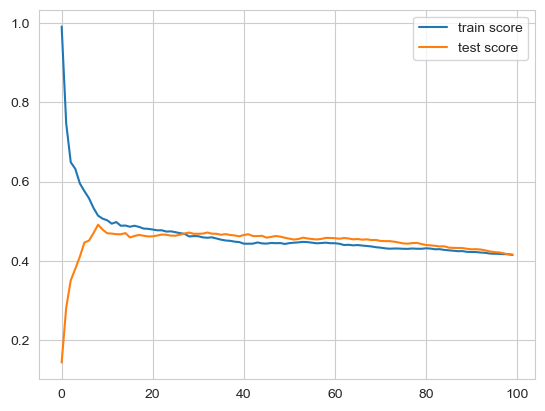

In [161]:
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()

In [162]:
# 역발상 : 전처리를 안해본다!
diabetesdf2=pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
diabetesdf2

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [163]:
diabetesdf2.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [164]:
# feature 선정 : bmi, s5
twofeatureDF2 = diabetesdf2[['BMI', 'S5']]

X_train, X_test, y_train, y_test = train_test_split(twofeatureDF2, diabetesdf2['Y'],
                                                    test_size=0.3, random_state=5)

In [165]:
# 선형 회귀 사용
LinearModel2 = LinearRegression()
LinearModel2.fit(X_train, y_train)

print(LinearModel2.score(X_train, y_train))
print(LinearModel2.score(X_test, y_test))

0.45955969768437976
0.4574376338572357


In [166]:
# KNN 회귀 사용
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel2 = KNeighborsRegressor(n_neighbors=k)
    KNNmodel2.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel2.score(X_train, y_train))
    test_scoreList.append(KNNmodel2.score(X_test, y_test))

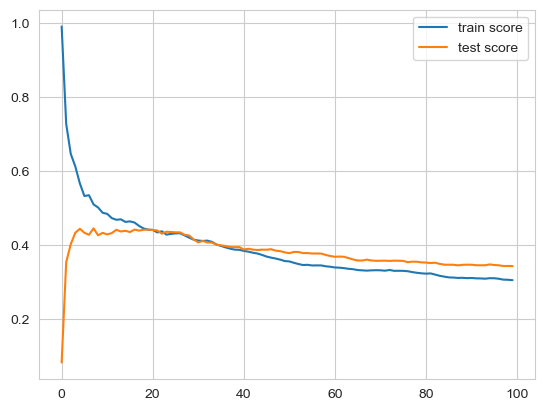

In [167]:
# 그럴리가 없지
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()

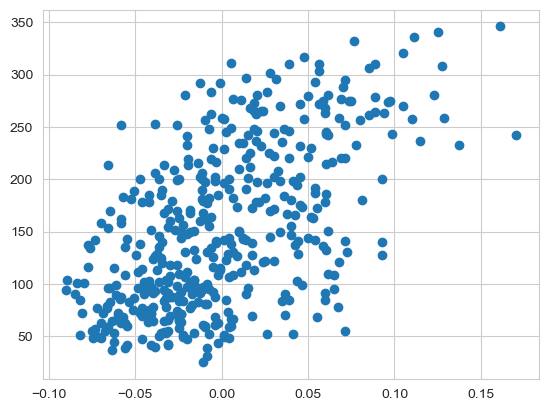

In [168]:
plt.scatter(featureDF['bmi'], targetArray)
plt.show()

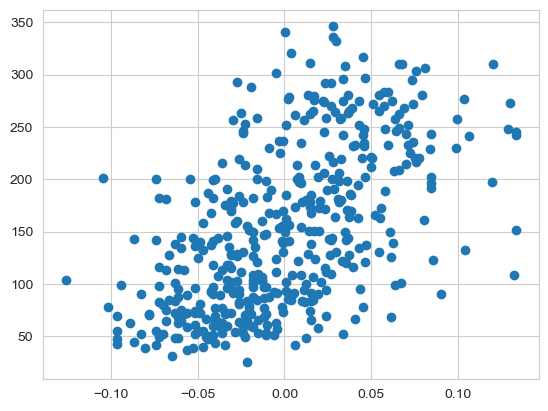

In [169]:
plt.scatter(featureDF['s5'], targetArray)
plt.show()

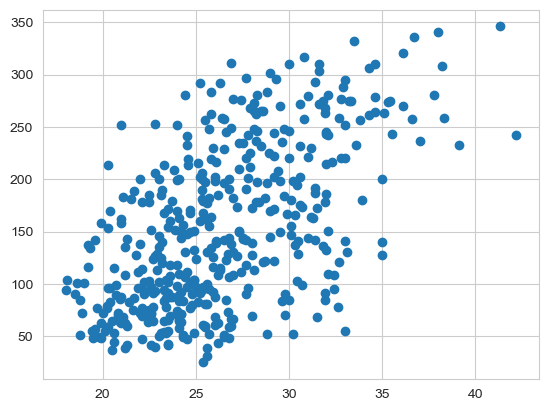

In [170]:
plt.scatter(diabetesdf2['BMI'], diabetesdf2['Y'])
plt.show()

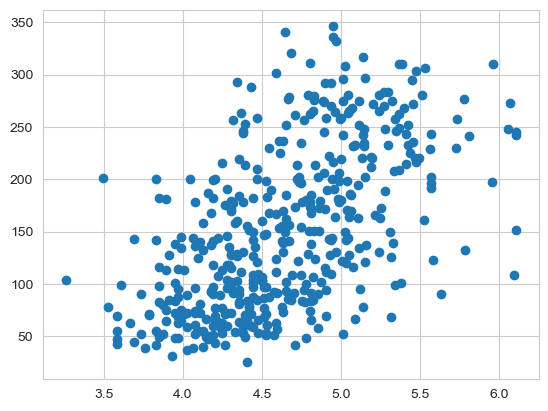

In [171]:
plt.scatter(diabetesdf2['S5'], diabetesdf2['Y'])
plt.show()

In [172]:
# feature 추가 : bp
threefeatureDF = featureDF[['bmi', 'bp', 's5']]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(threefeatureDF, targetArray,
                                                    test_size=0.3, random_state=5)

In [174]:
# 선형 회귀 사용
# 성능이 조금은 좋아졌다.
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

print(LinearModel.score(X_train, y_train))
print(LinearModel.score(X_test, y_test))

0.48027853666170683
0.4778104283068074


In [175]:
# KNN 회귀 사용
# 비슷비슷하다.
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))

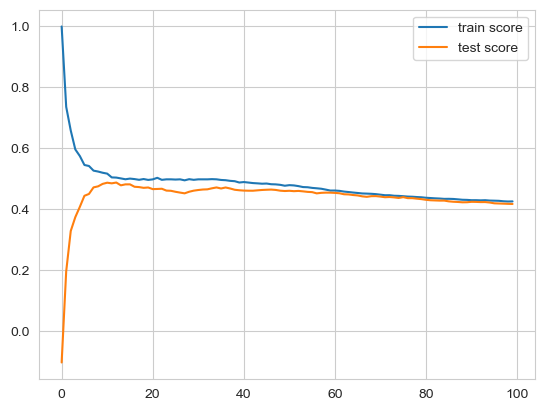

In [176]:
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()

In [177]:
max(test_scoreList)

0.4882816541034224

In [178]:
# 더이상 못참겠다
# feature을 더 추가해보자.
manyfeatureDF = featureDF[['bmi', 'bp', 's3', 's4', 's5', 's6']]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(manyfeatureDF, targetArray,
                                                    test_size=0.3, random_state=5)

In [180]:
# 선형 회귀 사용
# 성능이 조금 더더욱 좋아졌다.
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

print(LinearModel.score(X_train, y_train))
print(LinearModel.score(X_test, y_test))

0.4923699242638957
0.4918474069739571


In [181]:
# KNN 회귀 사용
# 어라 조금조금더 좋아졌다.
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))

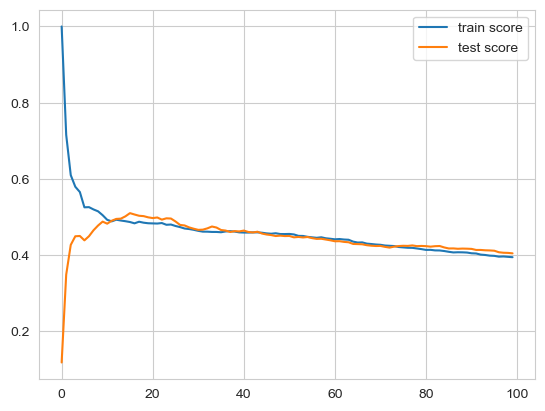

0.5102707177980155

In [182]:
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)

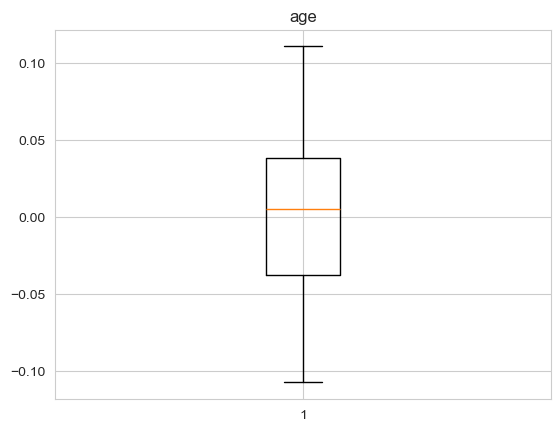

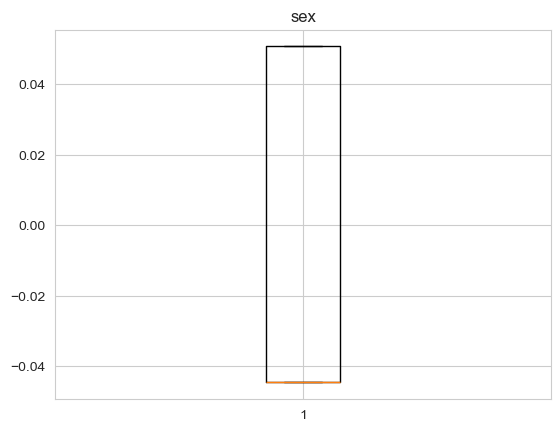

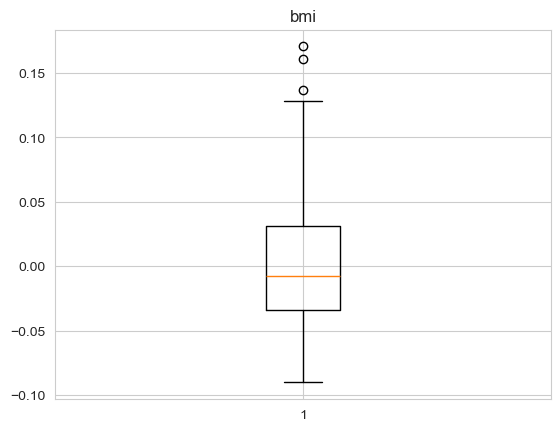

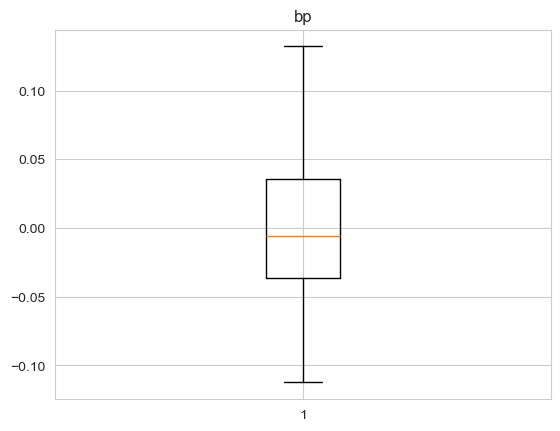

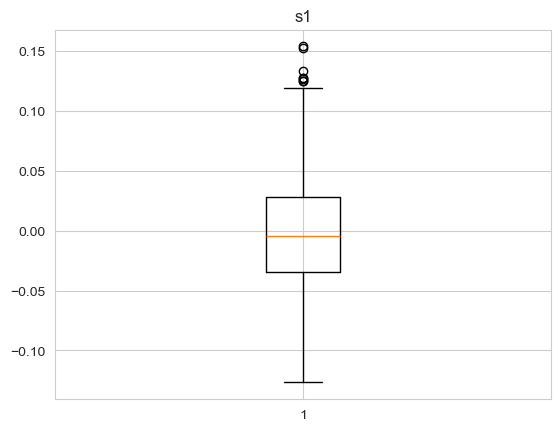

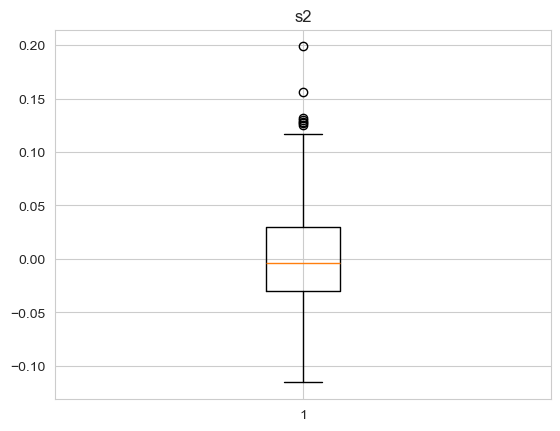

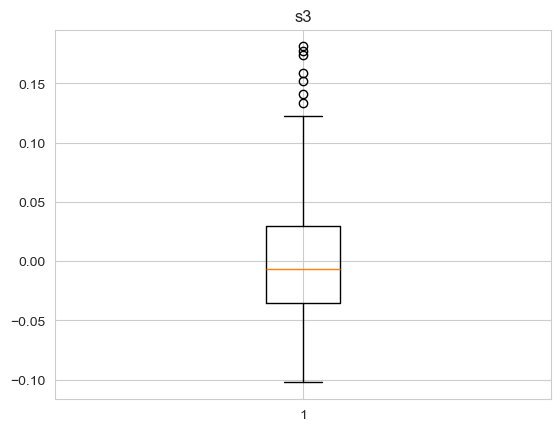

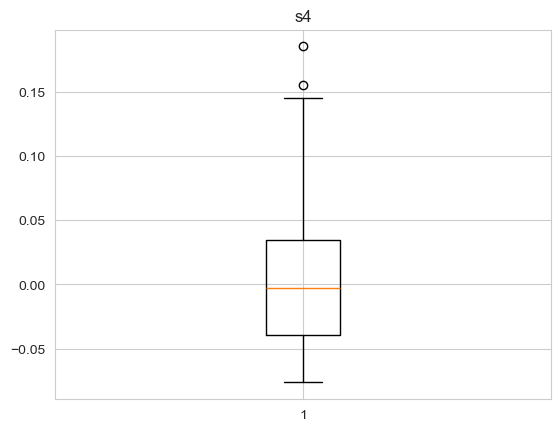

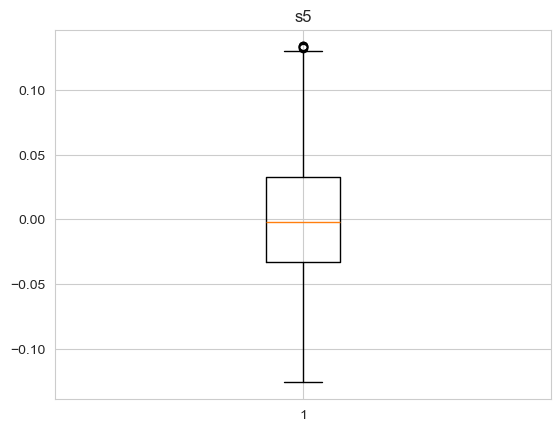

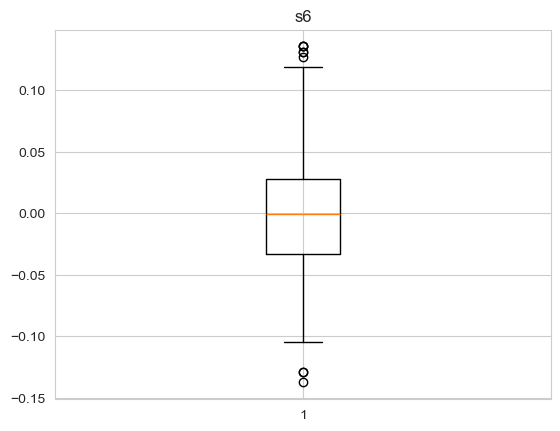

In [183]:
# 데이터가 정확히 어떻게 생겨먹었는지 봐야겠다.
for col in featureDF.columns:
    plt.boxplot(featureDF[col])
    plt.title(col)
    plt.show()

In [184]:
featureDF.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [185]:
# 가중치를 바꿔보자
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(weights='distance', n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))

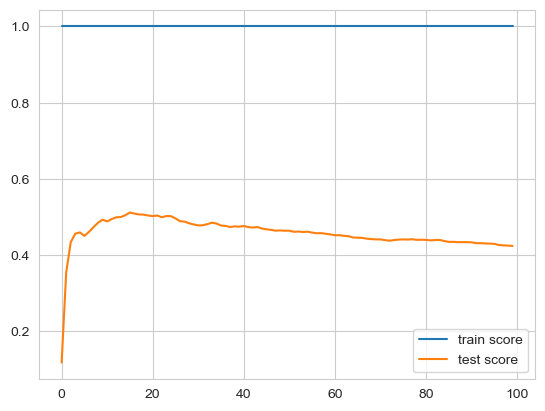

0.5119995155340507

In [186]:
# ....???
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)

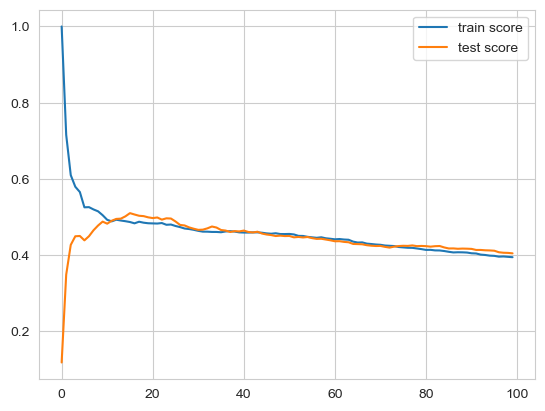

0.5102707177980155

In [187]:
# 알고리즘 수정 : 'ball_tree', 'kd_tree', 'brute'
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))
    
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)

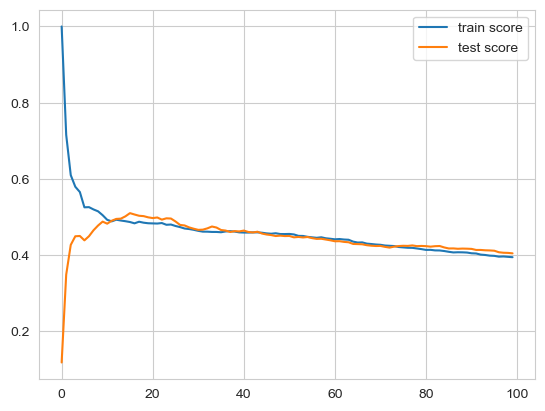

0.5102707177980155

In [188]:
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))
    
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)

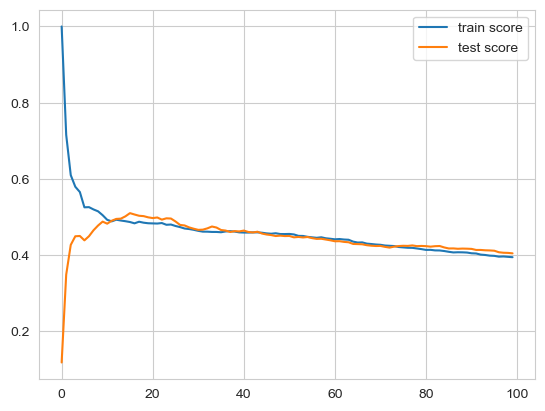

0.5102707177980155

In [189]:
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(algorithm='brute', n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))
    
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)
# 알고리즘은 차이가 없다. 말그대로 알고리즘만 다른듯.

In [192]:
# 스케일 기법을 로버스트 스케일러를 써보자.
origin_manyfeatureDF = diabetesdf2[['BMI', 'BP', 'S3', 'S4' ,'S5', 'S6']]

X_train, X_test, y_train, y_test = train_test_split(origin_manyfeatureDF, targetArray,
                                                    test_size=0.3, random_state=5)

Rscaler = RobustScaler()
Rscaler.fit(X_train)
r_X_train = Rscaler.transform(X_train)
r_X_test = Rscaler.transform(X_test)

In [193]:
# 시발 진짜
LinearModel = LinearRegression()
LinearModel.fit(r_X_train, y_train)

print(LinearModel.score(r_X_train, y_train))
print(LinearModel.score(r_X_test, y_test))

0.4923699242638957
0.4918474069739571


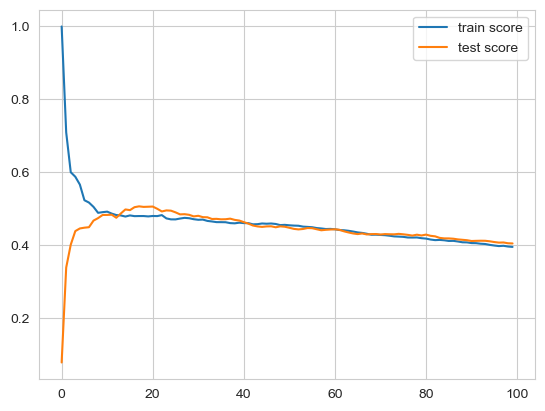

0.5060102842882142

In [195]:
# 더 구려졌다
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(n_neighbors=k)
    KNNmodel.fit(r_X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(r_X_train, y_train))
    test_scoreList.append(KNNmodel.score(r_X_test, y_test))
    
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)

In [196]:
# 데이터셋의 크기를 바꿔보자
X_train, X_test, y_train, y_test = train_test_split(manyfeatureDF, targetArray,
                                                    test_size=0.2, random_state=5)

In [198]:
# 더 좋아졌다..?
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

print(LinearModel.score(X_train, y_train))
print(LinearModel.score(X_test, y_test))

0.4882517187268155
0.5042575416442825


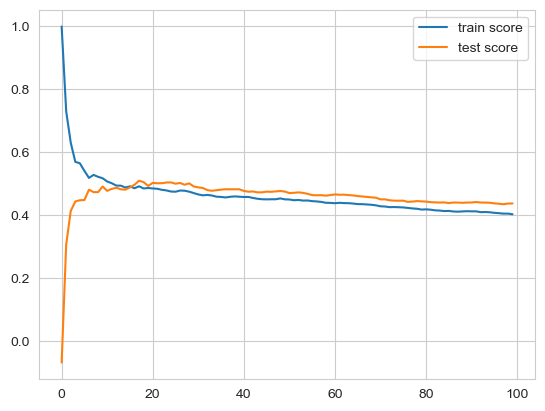

0.5097346904525766

In [199]:
# 여기는 더 구려졌다.
train_scoreList = []
test_scoreList = []
for k in range(1, 101):
    KNNmodel = KNeighborsRegressor(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    
    train_scoreList.append(KNNmodel.score(X_train, y_train))
    test_scoreList.append(KNNmodel.score(X_test, y_test))
    
plt.plot(train_scoreList, label='train score')
plt.plot(test_scoreList, label='test score')
plt.legend()
plt.show()
max(test_scoreList)

## 뭔짓을 해도 0.5 언저리에서 못올리겠다!!!

## 주변을 참고해보니 저정도만 나와도 잘 나오는 편인걸로 판단된다.

## 그만해야겠다.